
### Problem statement
<span style="color:blue">


LearnX Sales Forecasting
LearnX is an online learning platform aimed at professionals and students. LearnX serves as a market place that allows instructors to build online courses on topics of their expertise which is later published after due diligence by the LearnX team. The platform covers a wide variety of topics including Development, Business, Finance & Accounting & Software Marketing and so on

Effective forecasting for course sales gives essential insight into upcoming cash flow meaning business can more accurately plan the budget to pay instructors and other operational costs and invest in the expansion of the business.

Sales data for more than 2 years from 600 courses of LearnX's top domains is available along with information on

Competition in the market for each course
Course Type (Course/Program/Degree)
Holiday Information for each day
User Traffic on Course Page for each day
Your task is to predict the course sales for each course in the test set for the next 60 days.



### Solution
#### 1. Descriptive analysis of Variables
<span style="color:blue">

##### 1.1. Data Summary
##### 1.2. Encoding categorical attributes
##### 1.3. Data Correlation
##### 1.4. Data cleansing

####  2. Model building - Random Forest Regressor



#### Data Summary

In [1]:
import pandas as pd 
df = pd.read_csv("train.csv")
df.head(5)

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,1,1,Development,Course,0,1,1,11004,0.007,81
1,2,2,1,Development,Course,0,0,1,13650,0.007,79
2,3,3,1,Development,Course,0,0,1,11655,0.007,75
3,4,4,1,Development,Course,0,0,1,12054,0.007,80
4,5,5,1,Development,Course,0,0,1,6804,0.007,41


In [2]:
print(df.shape)


(512087, 11)


In [3]:
df.head(5)

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,1,1,Development,Course,0,1,1,11004,0.007,81
1,2,2,1,Development,Course,0,0,1,13650,0.007,79
2,3,3,1,Development,Course,0,0,1,11655,0.007,75
3,4,4,1,Development,Course,0,0,1,12054,0.007,80
4,5,5,1,Development,Course,0,0,1,6804,0.007,41


#### Encoding Categorical attributes


In [4]:
# Encoding the categorical attributes
df['Course_Domain']=df['Course_Domain'].astype('category')
df['Course_Domain']=df.Course_Domain.cat.codes

df['Course_Type']=df['Course_Type'].astype('category')
df['Course_Type']=df.Course_Type.cat.codes


In [5]:
df.head(5)


,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,1,1,1,0,0,1,1,11004,0.007,81
1,2,2,1,1,0,0,0,1,13650,0.007,79
2,3,3,1,1,0,0,0,1,11655,0.007,75
3,4,4,1,1,0,0,0,1,12054,0.007,80
4,5,5,1,1,0,0,0,1,6804,0.007,41


In [6]:
# get the basic statistical details like  count, mean, std etc. of a data
df.describe()

/root/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
count,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,510323.000000,512087.000000
mean,274007.300650,434.917869,300.388344,1.791162,0.970374,0.380244,0.031639,0.488968,15375.101198,0.073345,120.826924
std,158228.834029,256.044161,173.365787,0.911838,0.997837,0.485447,0.175038,0.499879,7727.231205,0.100115,54.355258
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000
25%,136962.500000,214.000000,150.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10584.000000,NaN,84.000000
50%,273984.000000,427.000000,300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,13776.000000,NaN,111.000000
75%,411065.500000,658.000000,451.000000,3.000000,2.000000,1.000000,0.000000,1.000000,18123.000000,NaN,146.000000
max,548027.000000,882.000000,600.000000,3.000000,2.000000,1.000000,1.000000,1.000000,100002.000000,0.768000,682.000000


Competition_Metric null entries are present

#### Correlation

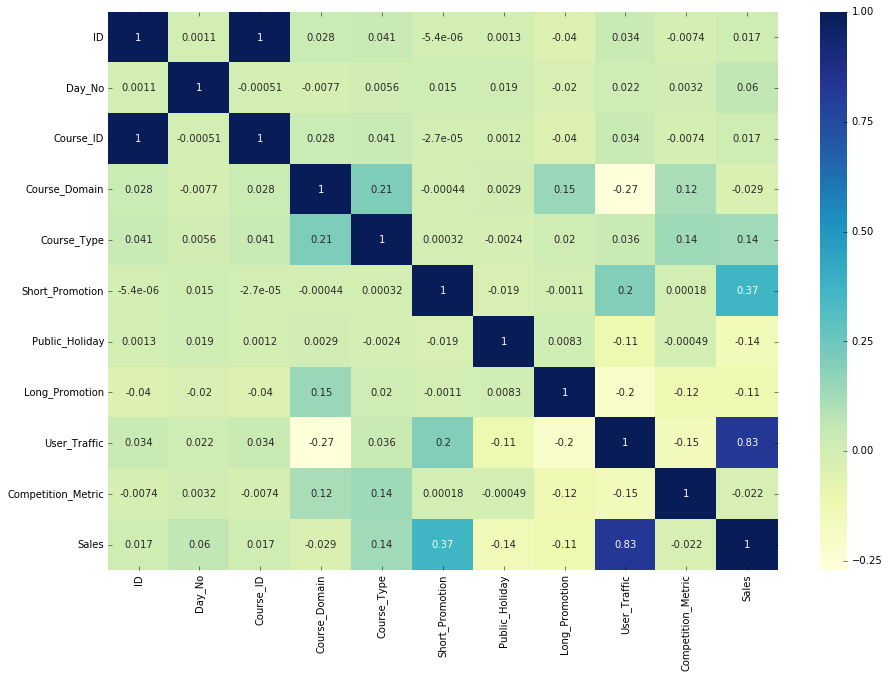

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

#####  As it is visible from the pairplot and the heatmap that the attribute Short_Promotion  has moderate positive correlation (0.365) with target attribute i.e sales.

#####  The attribute User_Traffic has strong positive correlation (0.829) with target attribute i.e sales.



#### Cleansing


In [8]:
# Finding the null values.
print(df.isnull().sum())

ID                       0
Day_No                   0
Course_ID                0
Course_Domain            0
Course_Type              0
Short_Promotion          0
Public_Holiday           0
Long_Promotion           0
User_Traffic             0
Competition_Metric    1764
Sales                    0
dtype: int64


In [9]:
df.drop('Competition_Metric',axis=1,inplace=True)
df.drop('User_Traffic',axis=1,inplace=True)

In [10]:
df.head(5)

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,Sales
0,1,1,1,1,0,0,1,1,81
1,2,2,1,1,0,0,0,1,79
2,3,3,1,1,0,0,0,1,75
3,4,4,1,1,0,0,0,1,80
4,5,5,1,1,0,0,0,1,41


In [11]:
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestRegressor


/root/anaconda3/lib/python3.5/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [12]:
X = df.iloc[:, 1:8].values
y = df.iloc[:, 8].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [13]:
model = RandomForestRegressor(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')


In [14]:
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [16]:
from sklearn.metrics import mean_squared_error
import numpy as np
rmse_train=np.sqrt(mean_squared_error(y_train,model.predict(X_train)))
print('RMSE: %4f' % rmse_train)


RMSE: 9.426949


In [18]:
rmse_test=np.sqrt(mean_squared_error(y_test,model.predict(X_test)))
print('RMSE: %4f' % rmse_test)

RMSE: 25.127945


In [21]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
#accuracy = accuracy_score(y_test, predictions)
#print("Accuracy: %.2f%%" % (accuracy * 100.0))

my_submission = pd.DataFrame({'y_test': y_test,'y_pred':y_pred, 'round-ypred': predictions})
# you could use any filename. We choose submission here
my_submission.to_csv('validate_check.csv', index=False)

#### Random Forest with grid search

In [23]:
model1 = RandomForestRegressor()


In [46]:
param_grid = {
    'bootstrap': [True], 
    'max_depth': [4,5,6,7,8], 
    'min_samples_leaf': [3],
    'max_features': ['auto','sqrt','log2'],
    'min_samples_split': [8],
    'n_estimators': [100,200]

}

In [47]:
grid_search=GridSearchCV(estimator=model1,param_grid=param_grid,cv=3)

In [50]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': [8], 'bootstrap': [True], 'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': [100, 200], 'min_samples_leaf': [3], 'max_depth': [4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [51]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [56]:
#rmse_train=np.sqrt(mean_squared_error(y_train,grid_search.predict(X_train)))
#print('RMSE: %4f' % rmse_train)

In [59]:
#rmse_test=np.sqrt(mean_squared_error(y_test,grid_search.predict(X_test)))
#print('RMSE: %4f' % rmse_test)